In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Load data

gla = pd.read_csv('/home/nathanhe/rfmix2_files/RFMix2_Out/chr14_result.rfmix.rfmix.Q', sep = '\t', skiprows = 1)
pca = pd.read_csv('/nfs/turbo/bakulski1/Projects/FFCW_geno/ffcw_projected_PC_data.csv')
pca['IID'] = pca['IID'].astype(str)
pca['FID'] = pca['FID'].astype(str)


gla[['FID', 'IID']] = gla['#sample'].str.split('_', expand=True)
gla = gla.drop('#sample', axis=1)

pca.head()
#gla.head()

FID        IID       PC1       PC2       PC3       PC4       PC5  \
0  1000002  1000002k5  0.021423 -0.007584 -0.003236 -0.001560 -0.000207   
1  1000002  1000002k5  0.021423 -0.007584 -0.003236 -0.001560 -0.000207   
2  1000005  1000005k5  0.023261 -0.008073 -0.004853 -0.001071  0.002262   
3  1000005  1000005k5  0.023261 -0.008073 -0.004853 -0.001071  0.002262   
4  1000019  1000019k5  0.019742 -0.005788 -0.003731 -0.001249 -0.000004   

        PC6       PC7       PC8  ...      PC13      PC14      PC15      PC16  \
0  0.003174 -0.004496  0.006586  ...  0.001321 -0.002148  0.004198 -0.001696   
1  0.003174 -0.004496  0.006586  ...  0.001321 -0.002148  0.004198 -0.001696   
2  0.002947 -0.003930 -0.000515  ... -0.001973  0.004777 -0.000339  0.000274   
3  0.002947 -0.003930 -0.000515  ... -0.001973  0.004777 -0.000339  0.000274   
4  0.004475 -0.002739  0.000580  ...  0.000475 -0.006253 -0.004949 -0.008306   

       PC17      PC18      PC19      PC20  Cluster            ethnicity  
0  0.004258 -0.003088 -0.000959  0.000794     ffcw  Black, non-Hispanic  
1  0.004258 -0.003088 -0.000959  0.000794     ffcw  Black, non-Hispanic  
2  0.000641 -0.001133  0.002445 -0.000262     ffcw  Black, non-Hispanic  
3  0.000641 -0.001133  0.002445 -0.000262     ffcw  Black, non-Hispanic  
4 -0.002175 -0.004057 -0.003929 -0.004064     ffcw  Black, non-Hispanic  

[5 rows x 24 columns]

In [2]:
#Include self-reported ethnicity
dat = pd.merge(gla, pca[['FID', 'IID', 'ethnicity']], on = ['FID', 'IID'], how='inner')
dat.columns = ['Sub-Saharan Africa', 'Central and South Asia', 'East Asia', 'Europe', 'Native America', 'Oceania', 'Middle East', 'FID', 'IID', 'ethnicity']

#All Samples
print('All Samples')
print(dat.iloc[:, 0:7].mean())

#White - Non-Hispanic
dat_white = dat[dat['ethnicity'] == 'White, non-Hispanic']
print('White Samples')
print(dat_white.iloc[:, 0:7].mean())

#Black - Non-Hispanic
dat_black = dat[dat['ethnicity'] == 'Black, non-Hispanic']
print('Black Samples')
print(dat_black.iloc[:, 0:7].mean())

#Hispanic
dat_hispanic = dat[dat['ethnicity'] == 'Hispanic']
print('Hispanic Samples')
print(dat_hispanic.iloc[:, 0:7].mean())

#Other
dat_other = dat[dat['ethnicity'] == 'Other']
print('Other Samples')
print(dat_other.iloc[:, 0:7].mean())
dat.head()

All Samples
Sub-Saharan Africa        0.499290
Central and South Asia    0.006457
East Asia                 0.020879
Europe                    0.372538
Native America            0.085380
Oceania                   0.000103
Middle East               0.015353
dtype: float64
White Samples
Sub-Saharan Africa        0.038531
Central and South Asia    0.003427
East Asia                 0.001627
Europe                    0.919995
Native America            0.024393
Oceania                   0.000000
Middle East               0.012028
dtype: float64
Black Samples
Sub-Saharan Africa        0.821267
Central and South Asia    0.005551
East Asia                 0.005425
Europe                    0.153372
Native America            0.006541
Oceania                   0.000064
Middle East               0.007781
dtype: float64
Hispanic Samples
Sub-Saharan Africa        0.121421
Central and South Asia    0.011257
East Asia                 0.006572
Europe                    0.459756
Native America         

Sub-Saharan Africa  Central and South Asia  East Asia   Europe  \
0             0.00000                 0.00000     0.0000  1.00000   
1             0.00000                 0.00000     0.0000  1.00000   
2             0.79933                 0.00000     0.1007  0.09998   
3             0.79933                 0.00000     0.1007  0.09998   
4             0.02024                 0.02144     0.0000  0.30848   

   Native America  Oceania  Middle East      FID        IID  \
0         0.00000      0.0      0.00000  4000527  4000527k5   
1         0.00000      0.0      0.00000  4000527  4000527k5   
2         0.00000      0.0      0.00000  6201078  6201078k5   
3         0.00000      0.0      0.00000  6201078  6201078k5   
4         0.63671      0.0      0.01313  5102097  5102097k5   

             ethnicity  
0  White, non-Hispanic  
1  White, non-Hispanic  
2  Black, non-Hispanic  
3  Black, non-Hispanic  
4             Hispanic

In [3]:
#Ancestry data without Oceania and S/C Asia
gla = pd.read_csv('/home/nathanhe/rfmix2_files/RFMix2_Out/chr14_result_five_ancestries.rfmix.rfmix.Q', sep = '\t', skiprows = 1)

gla[['FID', 'IID']] = gla['#sample'].str.split('_', expand=True)
gla = gla.drop('#sample', axis=1)

dat = pd.merge(gla, pca[['FID', 'IID', 'ethnicity']], on = ['FID', 'IID'], how='inner')

#All Samples
print('All Samples')
print(dat.iloc[:, 0:5].mean())

#White - Non-Hispanic
dat_white = dat[dat['ethnicity'] == 'White, non-Hispanic']
print('White Samples')
print(dat_white.iloc[:, 0:5].mean())

#Black - Non-Hispanic
dat_black = dat[dat['ethnicity'] == 'Black, non-Hispanic']
print('Black Samples')
print(dat_black.iloc[:, 0:5].mean())

#Hispanic
dat_hispanic = dat[dat['ethnicity'] == 'Hispanic']
print('Hispanic Samples')
print(dat_hispanic.iloc[:, 0:5].mean())

#Other
dat_other = dat[dat['ethnicity'] == 'Other']
print('Other Samples')
print(dat_other.iloc[:, 0:5].mean())
dat.head()




All Samples
East Asia             0.022151
Europe                0.375883
Middle East           0.018253
Native America        0.085288
Sub-Saharan Africa    0.498426
dtype: float64
White Samples
East Asia             0.001759
Europe                0.920960
Middle East           0.014401
Native America        0.024688
Sub-Saharan Africa    0.038193
dtype: float64
Black Samples
East Asia             0.006851
Europe                0.157665
Middle East           0.008954
Native America        0.006664
Sub-Saharan Africa    0.819867
dtype: float64
Hispanic Samples
East Asia             0.007793
Europe                0.463730
Middle East           0.046516
Native America        0.360729
Sub-Saharan Africa    0.121232
dtype: float64
Other Samples
East Asia             0.476994
Europe                0.169251
Middle East           0.016212
Native America        0.008571
Sub-Saharan Africa    0.328972
dtype: float64


East Asia   Europe  Middle East  Native America  Sub-Saharan Africa  \
0     0.0000  1.00000      0.00000         0.00000             0.00000   
1     0.0000  1.00000      0.00000         0.00000             0.00000   
2     0.1007  0.09998      0.00000         0.00000             0.79933   
3     0.1007  0.09998      0.00000         0.00000             0.79933   
4     0.0000  0.30824      0.01313         0.65755             0.02108   

       FID        IID            ethnicity  
0  4000527  4000527k5  White, non-Hispanic  
1  4000527  4000527k5  White, non-Hispanic  
2  6201078  6201078k5  Black, non-Hispanic  
3  6201078  6201078k5  Black, non-Hispanic  
4  5102097  5102097k5             Hispanic

In [12]:
#Choose 3 samples from self reported white, black and hispanic samples

#black samples
quantiles = dat_black['Sub-Saharan Africa'].quantile([0.25, 0.3, 0.75]).values
print(quantiles)

iid_quantiles = {}

# Calculate the IIDs for desired quantiles
for q in [0.25, 0.3, 0.75]:
    # Get the IID corresponding to the quantile
    quantile_value = dat_black['Sub-Saharan Africa'].quantile(q)
    print(quantile_value)
    # Assuming the IIDs are unique, this gets the IID of the first occurrence where the condition is met
    iid = dat_black[dat_black['Sub-Saharan Africa'] == quantile_value].iloc[0]['IID']
    print(iid)
    iid_quantiles[q] = iid

# This should give you a dictionary where you can access the values using .values()
iid_list = list(iid_quantiles.values())
print(iid_list)

[0.74789 0.77596 0.93736]
0.74789
1068156k5
0.77596
1053070k6
0.93736
2809652k5
['1068156k5', '1053070k6', '2809652k5']


Empty DataFrame
Columns: [East Asia, Europe, Middle East, Native America, Sub-Saharan Africa, FID, IID, ethnicity]
Index: []

In [15]:
rfmix_out = pd.read_csv('/home/nathanhe/rfmix2_files/RFMix2_Out/chr14_result_five_ancestries.rfmix.msp.tsv', sep = '\t', skiprows=1)
rfmix_out.head()
print(iid_list)     

# Using one of the methods above to filter the columns in df_cols
filtered_columns = rfmix_out[[col for col in rfmix_out.columns if any(iid in col for iid in iid_list)]]

filtered_columns.head()

#Combine with information to create files for LA painter
dat_all = rfmix_out.iloc[:, 0:6]
dat_all.head()

dat_q25 = pd.concat([dat_all, filtered_columns.iloc[: ,[0,1]]], axis=1)
dat_q25['#chm'] = 14
dat_q25.head()
print(filtered_columns.head())

dat_q30 = pd.concat([dat_all, filtered_columns.iloc[:, [0, 1]]], axis = 1)
dat_q30['#chm'] = 14
dat_q30.head()

dat_q30.to_csv('/home/nathanhe/rfmix2_files/ancestry_grapher/RFmix2-Pipeline-to-plot/LocalAncestryPaint/black_q30.rfmix.msp.tsv', sep='\t', index=False, header=True)
#dat_q25.to_csv('/home/nathanhe/rfmix2_files/ancestry_grapher/RFmix2-Pipeline-to-plot/LocalAncestryPaint/black_q25.rfmix.msp.tsv', sep='\t', index=False, header=True)

['1068156k5', '1053070k6', '2809652k5']
   1053070_1053070k6.0  1053070_1053070k6.1  1068156_1068156k5.0  \
0                    1                    4                    4   
1                    1                    4                    4   
2                    1                    4                    4   
3                    1                    4                    4   
4                    4                    4                    4   

   1068156_1068156k5.1  2809652_2809652k5.0  2809652_2809652k5.1  
0                    4                    4                    4  
1                    4                    4                    4  
2                    4                    4                    4  
3                    4                    4                    4  
4                    4                    4                    4  


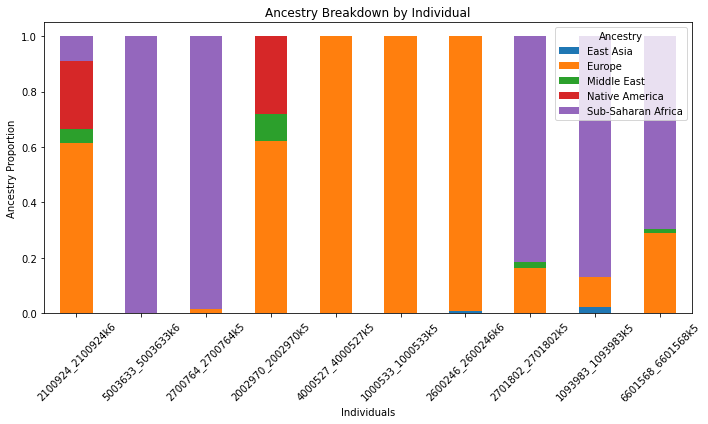

East Asia   Europe  Middle East  Native America  \
#sample                                                              
2100924_2100924k6        0.0  0.61515      0.04987         0.24572   
5003633_5003633k6        0.0  0.00000      0.00000         0.00000   
2700764_2700764k5        0.0  0.01445      0.00000         0.00000   
2002970_2002970k5        0.0  0.62262      0.09540         0.28198   
4000527_4000527k5        0.0  1.00000      0.00000         0.00000   

                   Sub-Saharan Africa  
#sample                                
2100924_2100924k6             0.08926  
5003633_5003633k6             1.00000  
2700764_2700764k5             0.98555  
2002970_2002970k5             0.00000  
4000527_4000527k5             0.00000

In [7]:
gla = pd.read_csv('/home/nathanhe/rfmix2_files/RFMix2_Out/chr14_result_five_ancestries.rfmix.rfmix.Q', sep = '\t', skiprows = 1)
#gla[['FID', 'IID']] = gla['#sample'].str.split('_', expand=True)

gla = gla.iloc[0:10, :]
# Set the sample column as the index
gla.set_index('#sample', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Plot each individual's ancestry breakdown as a stacked bar
gla.plot(kind='bar', stacked=True, ax=plt.gca())

plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.title('Ancestry Breakdown by Individual')
plt.legend(title='Ancestry')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

gla.head()

In [33]:
gla = pd.read_csv('/home/nathanhe/rfmix2_files/RFMix2_Out/chr14_result_five_ancestries.rfmix.rfmix.Q', sep = '\t', skiprows = 1)
gla[['FID', 'IID']] = gla['#sample'].str.split('_', expand=True)

dat = pd.merge(gla, pca[['FID', 'IID', 'ethnicity']], on = ['FID', 'IID'], how='inner')
dat.drop_duplicates(inplace=True)
gla.head()
pca.head()

df1 = dat.pop('East Asia') # remove column b and store it in df1
dat['East Asia']=df1 # add b series as a 'new' column.

#print(dat.head())

#Black samples

dat_black = dat[dat['ethnicity'] == 'Black, non-Hispanic']
dat_black.head()
#dat_black = dat_black.iloc[0:8, :]
# Set the sample column as the index
dat_black.set_index('#sample', inplace=True)
dat_black = dat_black.sort_values(by=['Europe'])

#White samples 

dat_white = dat[dat['ethnicity'] == 'White, non-Hispanic']
#dat_white = dat_white.iloc[0:8, :]
dat_white.set_index('#sample', inplace=True)
dat_white = dat_white.sort_values(by = ['Europe'])

#Hispanic Samples

dat_hisp = dat[dat['ethnicity'] == 'Hispanic']
#dat_hisp = dat_hisp.iloc[0:8, :]
dat_hisp.set_index('#sample', inplace=True)
dat_hisp = dat_hisp.sort_values(by = ['Europe', 'Native America'])

dat_other = dat[dat['ethnicity'] == 'Other']
dat_other.set_index('#sample', inplace=True)
dat_other = dat_other.sort_values(by = ['Europe', 'East Asia'])

plt_dat = pd.concat([dat_black, dat_hisp, dat_white, dat_other])
color = ['xkcd:mustard yellow', 'xkcd:magenta', 'green', 'xkcd:sapphire', 'xkcd:bright sky blue']

# Plotting
plt.figure(figsize=(15, 8), dpi = 1500)  # Adjust the figure size as needed

# Plot each individual's ancestry breakdown as a stacked bar
plt_dat.plot(kind='bar', stacked=True, ax=plt.gca(), width=1.0, color = color, alpha = 0.7)

plt.xlabel('Individuals')
plt.ylabel('Ancestry Proportion')
plt.title('Global Ancestry for FFCW Samples')
plt.legend(title='Ancestry', fontsize=18, loc = 'upper left')
plt.show()

